## 1.Load and Visualize Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')


In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [5]:
# Select features (e.g., 'Annual Income' and 'Spending Score')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [6]:
# Optional: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


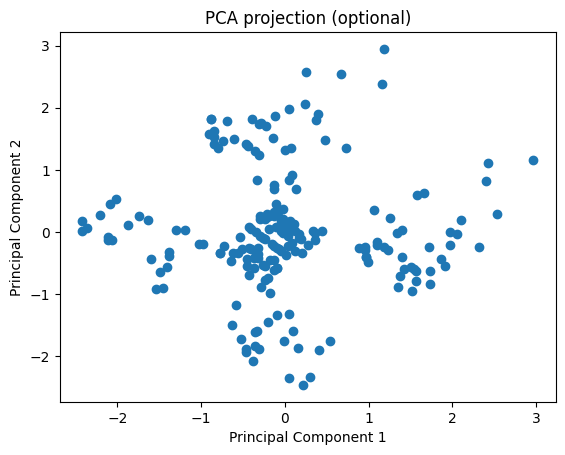

In [7]:
# Optional: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA projection (optional)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 2. Fit K-Means and Assign Cluster Labels


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Cluster'] = labels


## 3.Use the Elbow Method to Find Optimal K

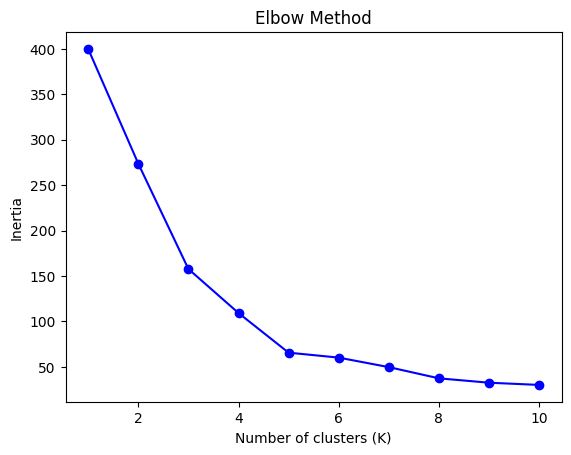

In [9]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## 4. Visualize Clusters with Color-Coding


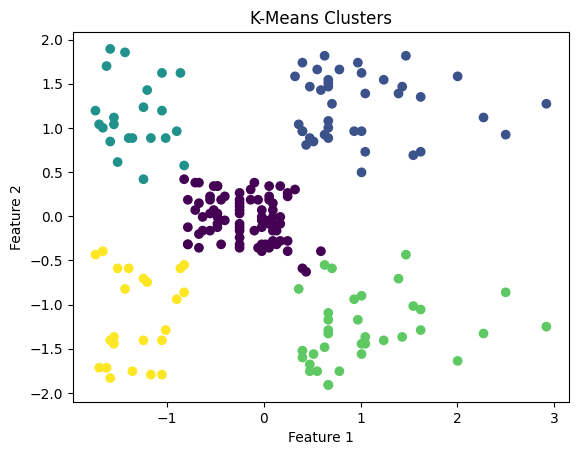

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## 5. Evaluate Clustering using Silhouette Score


In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score:.2f}')



Silhouette Score: 0.55
